In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from pprint import pprint
from sklearn.decomposition import PCA
import random
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data

In [2]:
cdata = pd.read_csv('../features/features_sample.csv')

# Test and Train Data

In [3]:
X_train, y_train = [], []
X_test, y_test = [], []

for _ in range(0,1):
    data = cdata.sample(frac=1)

    X = data[data.columns[0:10]]
    y = data[data.columns[10]]

    X_train.append(X[0:int(0.75*len(X))])
    y_train.append(y[0:int(0.75*len(y))])

    X_test.append(X[int(0.75*len(X)):])
    y_test.append(y[int(0.75*len(X)):])

# Random Forest

Training Error: 0.9642857142857143 (0.0)
Testing Error: 0.2631578947368421 (0.0)


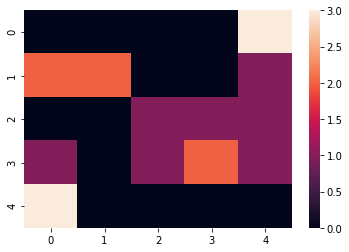

In [12]:
train_accuracy, test_accuracy = [], []

for i in range(0, len(X_train)):
    clf = RandomForestClassifier(max_depth=5, max_features=None)
    clf.fit(X_train[i], y_train[i])
    
    train_accuracy.append(clf.score(X_train[i], y_train[i]))
    test_accuracy.append(clf.score(X_test[i], y_test[i]))
    
    y_pred_0 = clf.predict(X_train[i])
    y_pred_1 = clf.predict(X_test[i])
    
    con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    
    sns.heatmap(con_1)
    
print('Training Error: {} ({})'.format(np.mean(train_accuracy), np.std(train_accuracy)))
print('Testing Error: {} ({})'.format(np.mean(test_accuracy), np.std(test_accuracy)))

# AdaBoost

Training Accuracy: 	 0.42857142857142855 (0.0)
Testing Accuracy: 	 0.42105263157894735 (0.0)


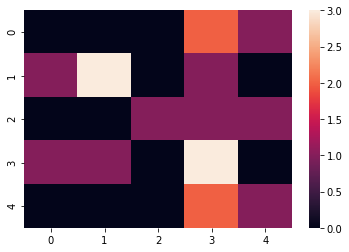

In [5]:
train_accuracy, test_accuracy = [], []

for i in range(0, len(X_train)):
    clf = AdaBoostClassifier()
    clf.fit(X_train[i], y_train[i])
    
    train_accuracy.append(clf.score(X_train[i], y_train[i]))
    test_accuracy.append(clf.score(X_test[i], y_test[i]))
    
    y_pred_0 = clf.predict(X_train[i])
    y_pred_1 = clf.predict(X_test[i])
    
    con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    
    sns.heatmap(con_1)
    
print('Training Accuracy: \t {} ({})'.format(np.mean(train_accuracy), np.std(train_accuracy)))
print('Testing Accuracy: \t {} ({})'.format(np.mean(test_accuracy), np.std(test_accuracy)))

# SVM

Training Accuracy: 	 1.0 (0.0)
Testing Accuracy: 	 0.3684210526315789 (0.0)


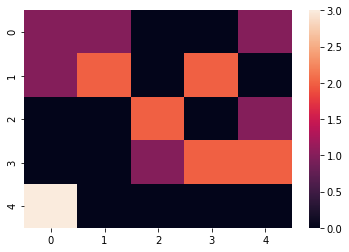

In [13]:
train_accuracy, test_accuracy = [], []

for i in range(0, len(X_train)):
    clf = svm.SVC(kernel='poly',probability=False)
    clf.fit(X_train[i], y_train[i])
    
    train_accuracy.append(clf.score(X_train[i], y_train[i]))
    test_accuracy.append(clf.score(X_test[i], y_test[i]))
    
    y_pred_0 = clf.predict(X_train[i])
    y_pred_1 = clf.predict(X_test[i])
    
    con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    
    sns.heatmap(con_1)
    
print('Training Accuracy: \t {} ({})'.format(np.mean(train_accuracy), np.std(train_accuracy)))
print('Testing Accuracy: \t {} ({})'.format(np.mean(test_accuracy), np.std(test_accuracy)))

## Number of Components vs Variation

In [7]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.explained_variance_ratio_ )

[7.73968610e-01 1.80748562e-01 2.54676899e-02 1.06463458e-02
 5.87980404e-03 1.90228352e-03 7.00519755e-04 4.56193216e-04
 1.83450164e-04 4.65418296e-05]
